<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Расчёт-эффективности-rougher.output.recovery" data-toc-modified-id="Расчёт-эффективности-rougher.output.recovery-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Расчёт эффективности rougher.output.recovery</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке." data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-и-количества-гранул-сырья-на-различных-этапах-очистки" data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-и-количества-гранул-сырья-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) и количества гранул сырья на различных этапах очистки</a></span></li><li><span><a href="#Анализ-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Анализ-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from scipy import stats as st

from numpy.random import RandomState

In [2]:
train_data = pd.read_csv('C:/datasets/9/gold_recovery_train_new.csv', index_col='date')
test_data = pd.read_csv('C:/datasets/9/gold_recovery_test_new.csv', index_col='date')
full_data = pd.read_csv('C:/datasets/9/gold_recovery_full_new.csv', index_col='date')

In [3]:
train_data.head(20)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


In [4]:
train_data.info();

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
test_data.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test_data.info();

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [7]:
full_data.head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,115.581252,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,117.322323,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,124.592960,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,131.781026,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188


In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

<b>Итоги первичного изучения данных</b>

- В тестовой выборке отсутствуют признаки, которые есть в тренировочной. Их нужно будет взять в исходных данных.



- В данных есть пропуски, которые нужно будет устранить для обучения модели.

### Расчёт эффективности rougher.output.recovery

Эффективность обогащения рассчитывается по формуле:
    
(C * (F - T)) / (F * (C - T)) * 100

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [9]:
def recovery_rate(C, F, T):
    recovery = (C * (F - T)) / (F * (C - T)) * 100 
    return recovery

In [10]:
train_data_C = train_data['rougher.output.concentrate_au']
train_data_F = train_data['rougher.input.feed_au']
train_data_T = train_data['rougher.output.tail_au']

In [11]:
train_data_recovery = recovery_rate(train_data_C, train_data_F, train_data_T)

print(mean_absolute_error(train_data['rougher.output.recovery'], train_data_recovery))

9.73512347450521e-15


<b>Итоги проверки рассчёта показателя эффективности обогащения чернового концентрата (rougher.output.recovery)</b>

Среднее абсолютное отклонение равно (MAE) <b>0.00000000000000973512</b>, то есть минимален, поэтому можно сделать вывод, что показатель эффективности обогащения чернового концентрата (<b>rougher.output.recovery</b>) рассчитан верно.

### Анализ признаков, недоступных в тестовой выборке.

In [12]:
full_data_absent = []
for i in full_data.columns.unique():
    if i not in test_data:
        full_data_absent.append(i)

print(full_data_absent)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

In [13]:
full_data[full_data_absent].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

<b>Итоги анализа признаков, недоступных в тестовой выборке.</b>

Всего в тестовой выборке отсутствует <b>34</b> признака.

Признаки с типом параметра <b>output</b> являются целевыми, поэтому их нет в тестовой выборке.

Признаки с типом параметра <b>calculation</b>, скорее всего рассчитываются после по окончании процесса получения золота.

Все данные, отсутствующие в тестовой выборке, имеют тип <b>float64</b>.

### Предобработка данных.

In [14]:
# Смотрю количество пропусков в выборке

train_data.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.state.floatbank10_d_air                0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
rougher.output.concentrate_ag                  0
Length: 86, dtype: int64

In [15]:
# Смотрю количество пропусков в выборке

test_data.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.sulfate                  4
primary_cleaner.input.xanthate                 4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank3_b_air       0
rougher.state.floatbank10_f_air                0
rougher.state.floatbank10_f_level              0
secondary_cleaner.state.floatbank6_a_air       0
secondary_cleaner.state.floatbank5_b_level     0
secondary_cleaner.state.floatbank2_a_level     0
secondary_cleaner.state.floatbank5_b_air       0
secondary_cleaner.st

In [16]:
# Смотрю количество пропусков в выборке

full_data.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_sol                        0
rougher.output.tail_au                         0
rougher.output.concentrate_ag                  0
Length: 86, dtype: int64

In [17]:
# Удаляю пропуски в тестовой и обучающей выборках

train_data = train_data.dropna()
test_data = test_data.dropna()

In [18]:
train_data.info();

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                             

In [19]:
test_data.info();

<class 'pandas.core.frame.DataFrame'>
Index: 5229 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5229 non-null   float64
 1   primary_cleaner.input.depressant            5229 non-null   float64
 2   primary_cleaner.input.feed_size             5229 non-null   float64
 3   primary_cleaner.input.xanthate              5229 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5229 non-null

<b>Итоги предобработки данных.</b>

- Признаки, которых нет в тестовой выборке, удалены из обучающей.
- В обучающей и тестовой выборках одинаковое количество признаков.
- Пропуски в обучающей и тестовой выборках удалены. 

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) и количества гранул сырья на различных этапах очистки

In [20]:
# Убираю выбросы

train_data = train_data[train_data['rougher.input.feed_ag'] > 0.5]
train_data = train_data[train_data['rougher.input.feed_au'] > 0.5]
train_data = train_data[train_data['rougher.input.feed_pb'] > 0.5]
train_data = train_data[train_data['rougher.output.concentrate_pb'] > 0.5]
train_data = train_data[train_data['rougher.output.concentrate_ag'] > 0.5]
train_data = train_data[train_data['rougher.output.concentrate_au'] > 0.5]
train_data = train_data[train_data['final.output.concentrate_au'] > 0.5]
train_data = train_data[train_data['final.output.concentrate_ag'] > 0.5]
train_data = train_data[train_data['final.output.concentrate_pb'] > 0.5]
train_data = train_data[train_data['primary_cleaner.output.concentrate_au'] > 0.5]
train_data = train_data[train_data['primary_cleaner.output.concentrate_ag'] > 0.5]
train_data = train_data[train_data['primary_cleaner.output.concentrate_pb'] > 0.5]

In [21]:
au = ['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au']
ag = ['final.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag']
pb = ['final.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb']

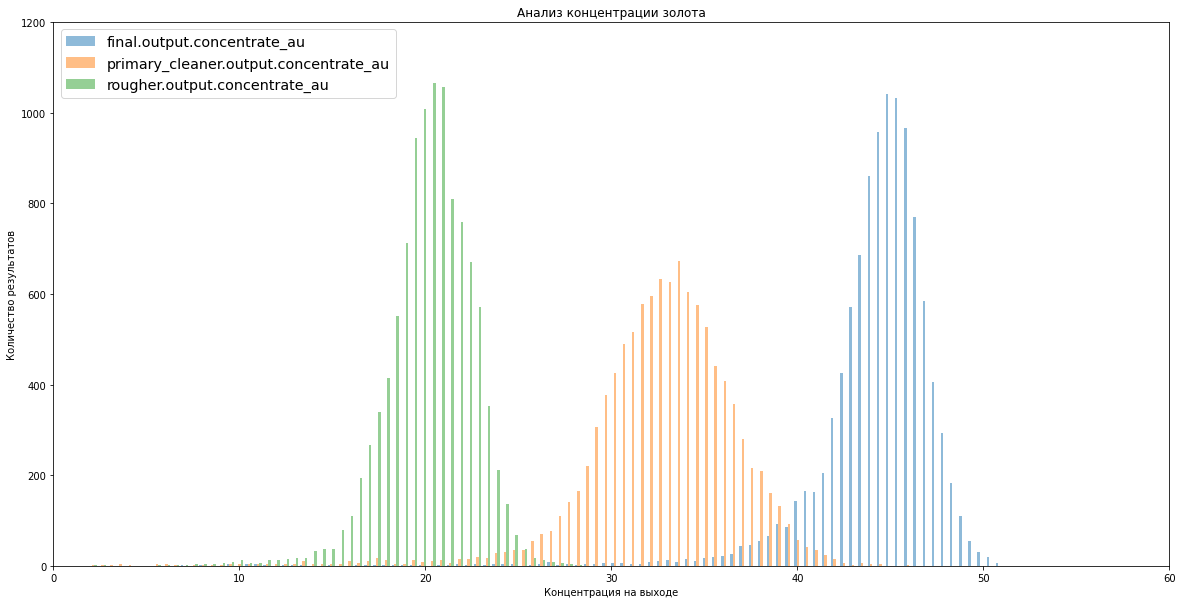

In [22]:
plt.figure(figsize=[20,10])

plt.hist(train_data[au], bins=100, alpha=0.5, label=au)

plt.ylim([0, 1200])
plt.xlim([0, 60])

plt.xlabel('Концентрация на выходе')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Анализ концентрации золота')
plt.show()

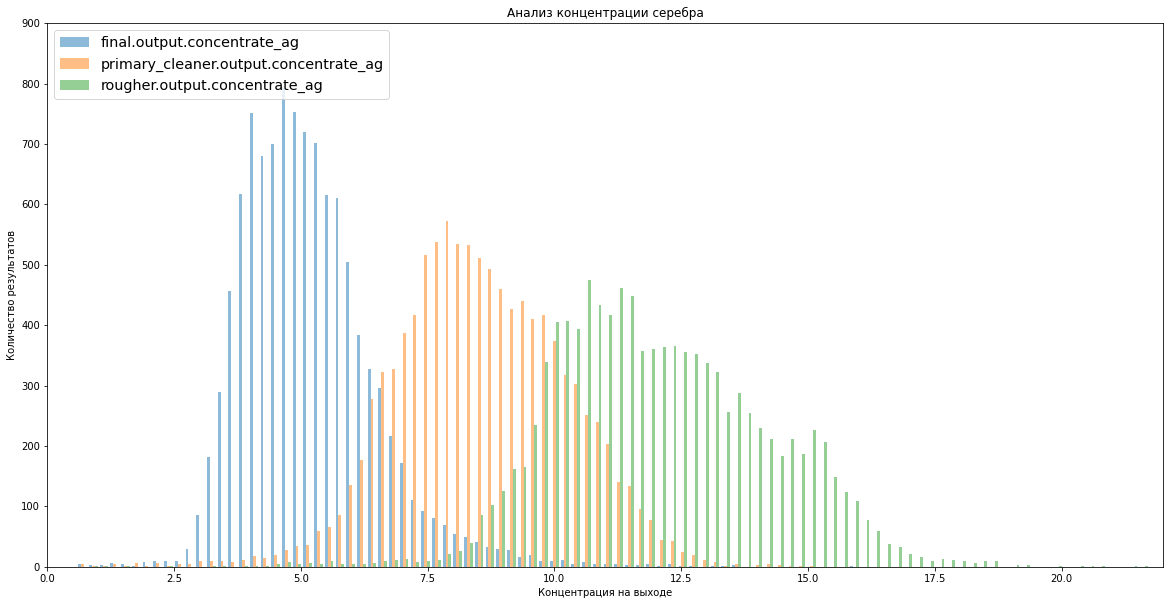

In [23]:
plt.figure(figsize=[20,10])

plt.hist(train_data[ag], bins=100, alpha=0.5, label=ag)

plt.ylim([0, 900])
plt.xlim([0, 22])

plt.xlabel('Концентрация на выходе')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Анализ концентрации серебра')
plt.show()

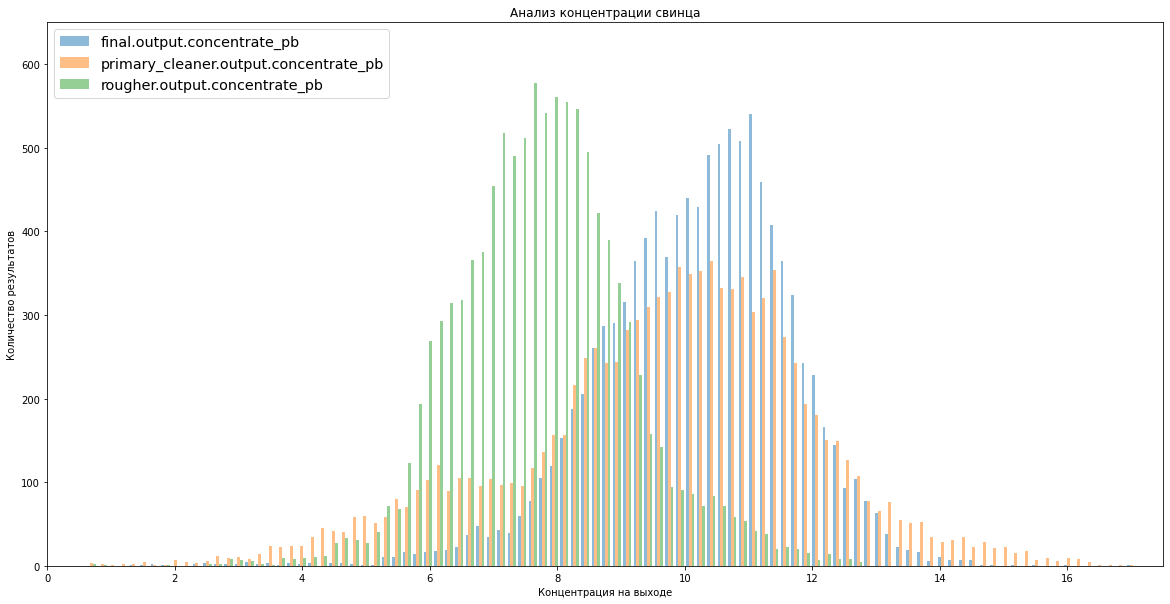

In [24]:
plt.figure(figsize=[20,10])

plt.hist(train_data[pb], bins=100, alpha=0.5, label=pb)

plt.ylim([0, 650])
plt.xlim([0, 17.5])

plt.xlabel('Концентрация на выходе')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Анализ концентрации свинца')
plt.show()

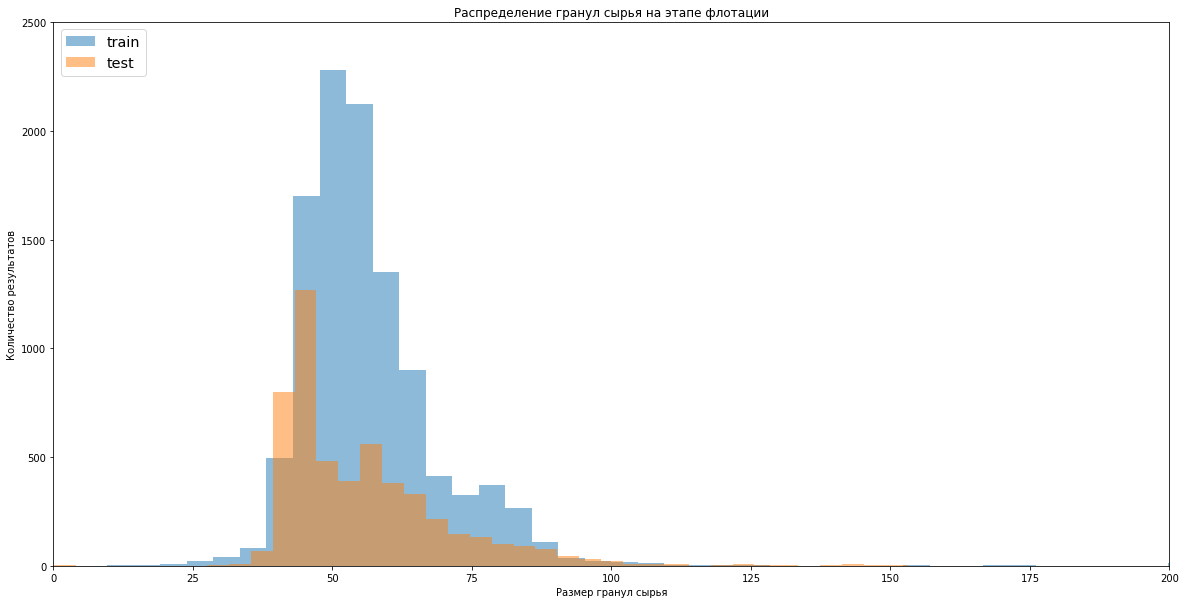

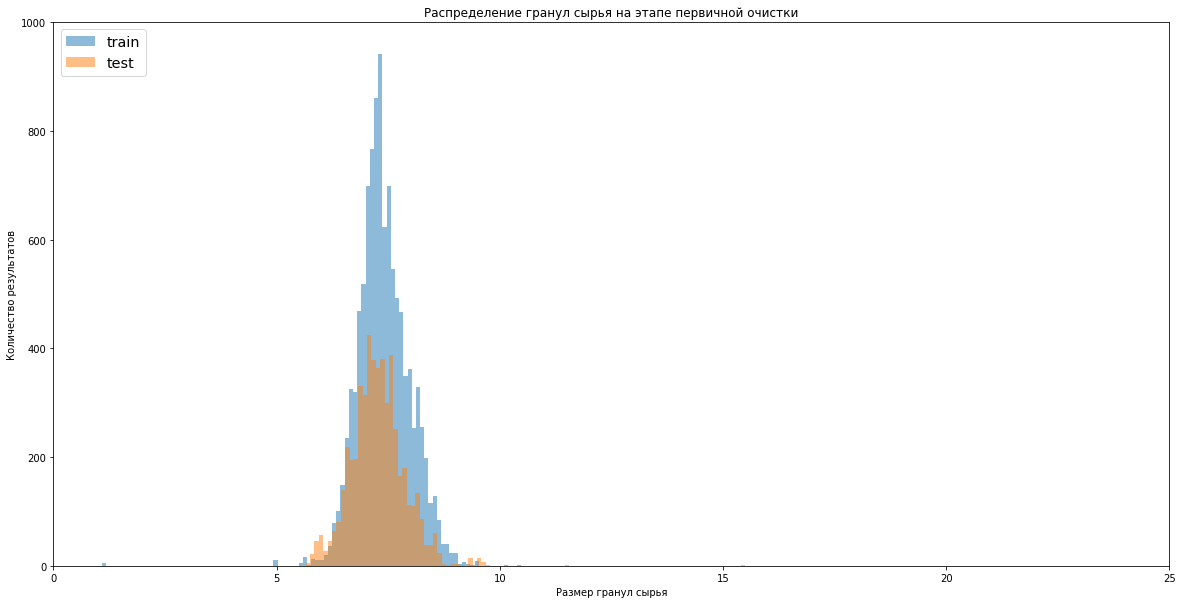

In [25]:
feed_size = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

# Вывожу распределение гранул сырья на этапе флотации

plt.figure(figsize=[20,10])

plt.hist(train_data['rougher.input.feed_size'], bins=100, alpha=0.5, label='train')
plt.hist(test_data['rougher.input.feed_size'], bins=100, alpha=0.5, label='test')

plt.ylim([0, 2500])
plt.xlim([0, 200])

plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Распределение гранул сырья на этапе флотации')
plt.show()

# Вывожу распределение гранул сырья на этапе первичной очистки

plt.figure(figsize=[20,10])

plt.hist(train_data['primary_cleaner.input.feed_size'], bins=100, alpha=0.5, label='train')
plt.hist(test_data['primary_cleaner.input.feed_size'], bins=100, alpha=0.5, label='test')

plt.ylim([0, 1000])
plt.xlim([0, 25])

plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Распределение гранул сырья на этапе первичной очистки')
plt.show()

<b>Итоги анализа концентрации металлов (Au, Ag, Pb) и количества гранул сырья на различных этапах очистки</b>

- Концентрация <b>золота</b> повышаются после флотации, первичной и вторичной очистки. Максимальная концентрация достигается после вторичной очистки.


- Концентрация <b>серебра</b> понижается после флотации, первичной и вторичной очистки. Максимальная концентрация серебра после флотации.


- Концентрация <b>свинца</b> понижается после первичной очистки и повышается после вторичной. Концентрация свинца максимальна после флотации и вторичной очистки.

- Распределение <b>гранул сырья</b> на обучающей и тестовой выборках совпадает.

### Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [26]:
rougher_input = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']
rougher_output = ['rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au']
final_output = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

        
print('Концентрация веществ в сырье:', train_data[rougher_input].sum().sum())
print('Концентрация веществ в черновом концентрате:', train_data[rougher_output].sum().sum())
print('Концентрация веществ в финальном концентрате:', train_data[final_output].sum().sum())

Концентрация веществ в сырье: 217730.2402426313
Концентрация веществ в черновом концентрате: 426134.61632617685
Концентрация веществ в финальном концентрате: 635266.9011382299


No handles with labels found to put in legend.


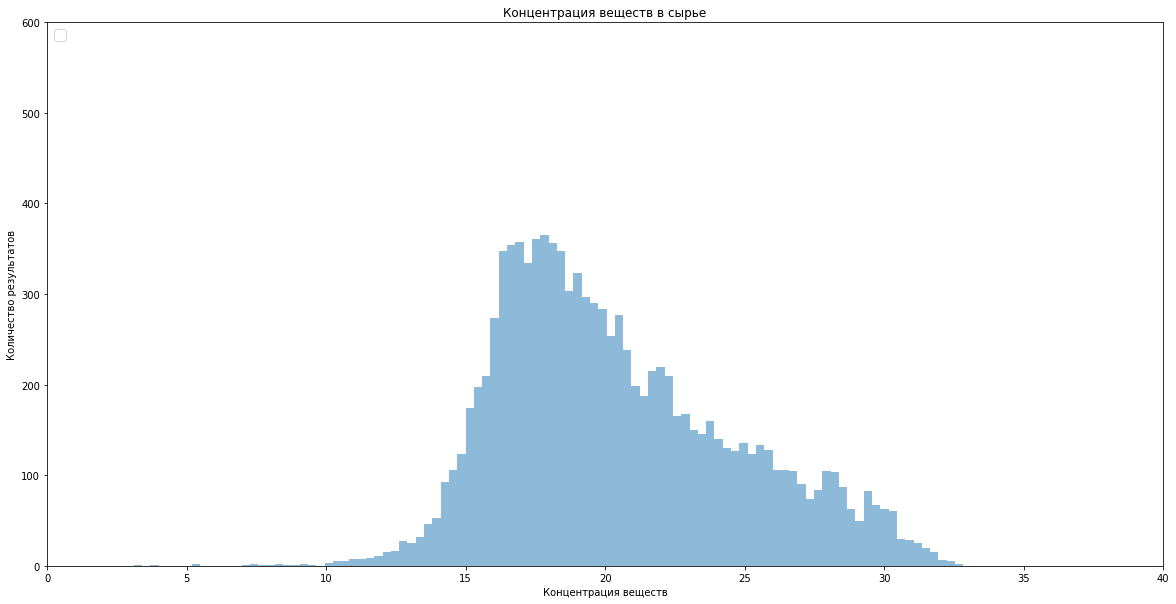

In [27]:
# Вывожу распределение концентрации веществ в сырье

rougher_input_data = train_data['rougher.input.feed_ag'] + train_data['rougher.input.feed_pb'] + train_data['rougher.input.feed_au']

plt.figure(figsize=[20,10])

plt.hist(rougher_input_data, bins=100, alpha=0.5)

plt.ylim([0, 600])
plt.xlim([0, 40])


plt.xlabel('Концентрация веществ')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Концентрация веществ в сырье')
plt.show()

No handles with labels found to put in legend.


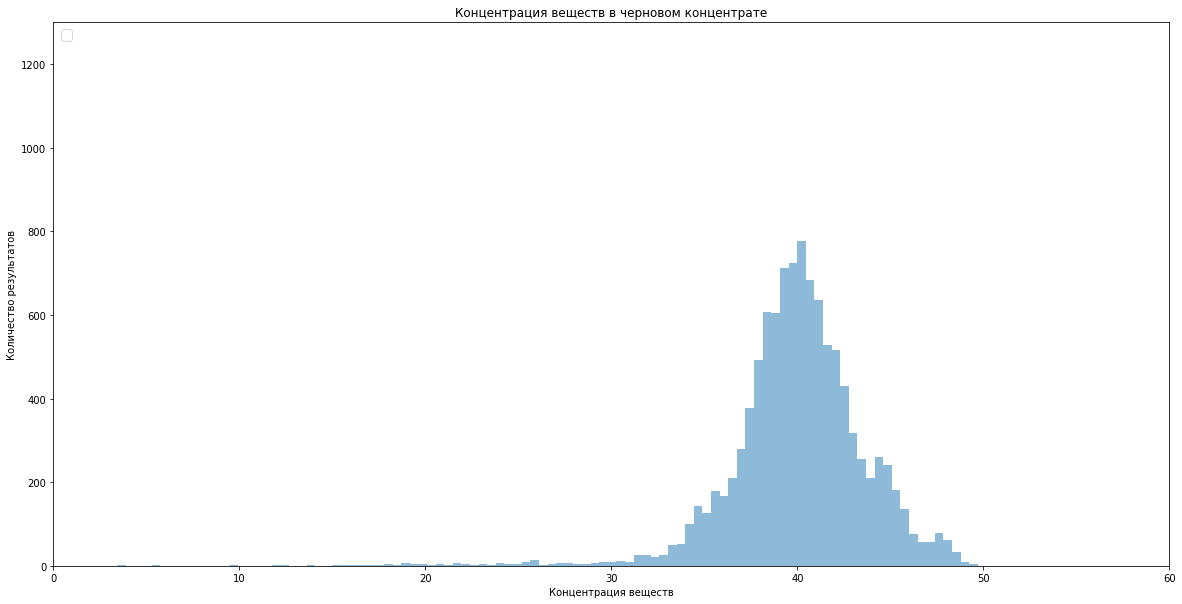

In [28]:
# Вывожу распределение концентрации веществ в черновом концентрате

rougher_output_data = train_data['rougher.output.concentrate_pb'] + train_data['rougher.output.concentrate_ag'] + train_data['rougher.output.concentrate_au']

plt.figure(figsize=[20,10])

plt.hist(rougher_output_data, bins=100, alpha=0.5)

plt.ylim([0, 1300])
plt.xlim([0, 60])

plt.xlabel('Концентрация веществ')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Концентрация веществ в черновом концентрате')
plt.show()

No handles with labels found to put in legend.


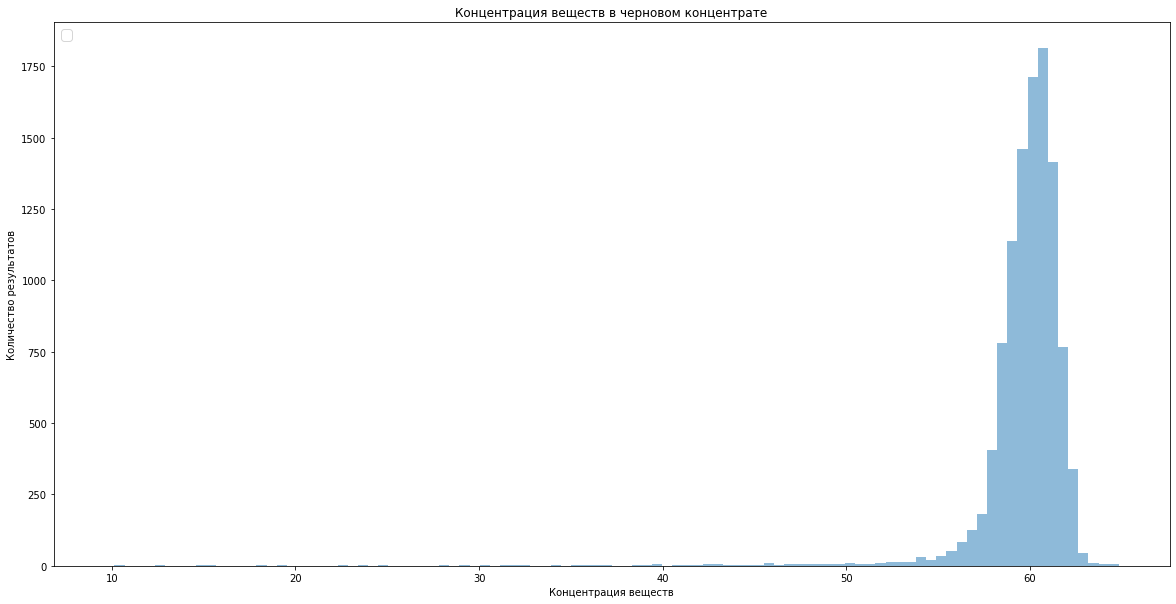

In [29]:
# Вывожу распределение концентрации веществ в финальном концентрате

final_output_data = train_data['final.output.concentrate_au'] + train_data['final.output.concentrate_ag'] + train_data['final.output.concentrate_pb']

plt.figure(figsize=[20,10])

plt.hist(final_output_data, bins=100, alpha=0.5)

plt.xlabel('Концентрация веществ')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Концентрация веществ в черновом концентрате')
plt.show()

<b>Итоги анализа суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</b>

- Концентрация веществ в сырье: <b>225138.7934659248</b>


- Концентрация веществ в черновом концентрате: <b>432208.9399867105</b>


- Концентрация веществ в финальном концентрате: <b>655078.0463303097</b>

На графиках видно, как концентрация постепенно увеличивается, а дисперсия понижается.

Концентрация веществ возрастает в 1.9 раз после флотации и в 1.5 раза после второго этапа очистки.

Нулевые и около нулевые значения концентраций были удалены, потому что, скорее всего, они были связаны со сбоем измерительного оборудования.

## Модель

In [30]:
# Пишу функцию для вычисления sMAPE

def smape_score_old(model, features, target):
    predictions = model.predict(features)
    numer = np.abs(target - predictions)
    denom = (np.abs(target) + np.abs(predictions)) / 2 
    score = 1 / len(target) * np.sum(numer / denom) * 100 
    return score

In [31]:
def smape_score_new(target, predictions):
    numer = np.abs(target - predictions)
    denom = (np.abs(target) + np.abs(predictions)) / 2 
    score = 1 / len(target) * np.sum(numer / denom) * 100 
    return score

In [32]:
def smape_score_new_old(target, predictions):
    smape_score_all = []
    numer = np.abs(target - predictions)
    denom = (np.abs(target) + np.abs(predictions)) / 2 
    score = 1 / len(target) * np.sum(numer / denom) * 100 
    smape_score_all.append(score)
    smape_score_all_mean = sum(smape_score_all) / len(smape_score_all)
    return smape_score_all_mean

In [33]:
# Пишу функцию для вычисления итоговой sMAPE
    
def final_smape_score(smape_score_rougher, smape_score_final):
    score = 0.25 * smape_score_rougher + 0.75 * smape_score_final
    return score

In [34]:
scorer_smape = make_scorer(smape_score_new)

In [35]:
test_data['rougher.output.recovery'] = full_data.loc[test_data.index, 'rougher.output.recovery']
test_data['final.output.recovery'] = full_data.loc[test_data.index,'final.output.recovery']

In [36]:
for column in train_data.columns:
    if column not in test_data.columns:
        train_data = train_data.drop(column, axis=1)  

In [37]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [38]:
features_train = train_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = train_data['rougher.output.recovery']
target_train_final = train_data['final.output.recovery']

features_test = test_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = test_data['rougher.output.recovery']
target_test_final = test_data['final.output.recovery']

In [39]:
model_1_rougher = LinearRegression()
scores_rougher_cross_val = cross_val_score(
    model_1_rougher, 
    features_train, 
    target_train_rougher, 
    cv=5, 
    scoring=scorer_smape)

model_1_final = LinearRegression()
scores_final_cross_val = cross_val_score(
    model_1_final, 
    features_train, 
    target_train_final, 
    cv=5, 
    scoring=scorer_smape)

scores_rougher_cross_val = sum(scores_rougher_cross_val) / len(scores_rougher_cross_val)    
scores_final_cross_val = sum(scores_final_cross_val) / len(scores_final_cross_val)

final_score = 0.25 * scores_rougher_cross_val + 0.75 * scores_final_cross_val

print('Итоговое значение sMape для линейной регрессии равно', final_score)

Итоговое значение sMape для линейной регрессии равно 8.411246385938751


In [42]:
# Вычисляю оптимальные параметры для дерева решений

best_depth = 1
best_score = 25

for depth in range(1, 100, 5):
    model_2_rougher = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores_rougher_cross_val = cross_val_score(
    model_2_rougher, 
    features_train, 
    target_train_rougher, 
    cv=5, 
    scoring=scorer_smape)
    scores_rougher_cross_val = sum(scores_rougher_cross_val) / len(scores_rougher_cross_val)
    if scores_rougher_cross_val < best_score:
        best_score = scores_rougher_cross_val
        best_depth = depth
        
print('Оптимальное значение параметра depth для дерева решений:', best_depth)

Оптимальное значение параметра depth для дерева решений: 6


In [41]:
# Вычисляю значение sMAPE для дерева решений и проверяю модель кросс-валидацией

model_2_rougher = DecisionTreeRegressor(random_state=12345, max_depth=6)
scores_rougher_cross_val = cross_val_score(
    model_2_rougher, 
    features_train, 
    target_train_rougher, 
    cv=5, 
    scoring=scorer_smape)

model_2_final = DecisionTreeRegressor(random_state=12345, max_depth=6)
scores_final_cross_val = cross_val_score(
    model_2_final, 
    features_train, 
    target_train_final, 
    cv=5, 
    scoring=scorer_smape)

scores_rougher_cross_val = sum(scores_rougher_cross_val) / len(scores_rougher_cross_val)    
scores_final_cross_val = sum(scores_final_cross_val) / len(scores_final_cross_val)

final_score = 0.25 * scores_rougher_cross_val + 0.75 * scores_final_cross_val

print('Итоговое значение sMape для дерева решений равно', final_score)

Итоговое значение sMape для дерева решений равно 9.522850487073354


In [ ]:
# Вычисляю оптимальные параметры для случайного леса регрессии

best_depth = 0
best_est = 0
best_score = 25

for depth in range(1, 100, 5):
    for est in range(1, 100, 5):
        model_3_rougher = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        scores_rougher_cross_val = cross_val_score(
        model_3_rougher, 
        features_train, 
        target_train_rougher, 
        cv=5, 
        scoring=scorer_smape)
        scores_rougher_cross_val = sum(scores_rougher_cross_val) / len(scores_rougher_cross_val)
        if scores_rougher_cross_val < best_score:
            best_score = scores_rougher_cross_val
            best_depth = depth
            best_est = est
        
print('Оптимальное значение параметра depth для случайного леса:', best_depth)
print('Оптимальное значение параметра n_estimators для случайного леса:', best_est)

In [42]:
# Вычисляю значение sMAPE для дерева решений и проверяю модель кросс-валидацией

model_3_rougher = RandomForestRegressor(random_state=12345, n_estimators=51, max_depth=6)
scores_rougher_cross_val = cross_val_score(
    model_3_rougher, 
    features_train, 
    target_train_rougher, 
    cv=5, 
    scoring=scorer_smape)

model_3_final = RandomForestRegressor(random_state=12345, n_estimators=51, max_depth=6)
scores_final_cross_val = cross_val_score(
    model_3_final, 
    features_train, 
    target_train_final, 
    cv=5, 
    scoring=scorer_smape)

scores_rougher_cross_val = sum(scores_rougher_cross_val) / len(scores_rougher_cross_val)    
scores_final_cross_val = sum(scores_final_cross_val) / len(scores_final_cross_val)

final_score = 0.25 * scores_rougher_cross_val + 0.75 * scores_final_cross_val

print('Итоговое значение sMape для случайного леса равно', final_score)

Итоговое значение sMape для случайного леса равно 8.278709379535842


<b>Итоги обучения разных моделей и оценки их качества кросс-валидацией.</b>

- Итоговое значение sMAPE для линейной регрессии равно <b>8.411246385938751</b>


- Итоговое значение sMAPE для дерева решений равно <b>9.522850487073354</b>. Оптимальное значение параметра depth для дерева решений: 6.


- Итоговое значение sMape для случайного леса регрессии равно <b>8.278709379535842</b>. Оптимальное значение параметра depth для дерева решений: 6. Оптимальное значение параметра n_estimators для дерева решений: 51.

Лучший результат дала модель случайного леса регрессии.

In [39]:
model_3_rougher = RandomForestRegressor(random_state=12345, n_estimators=51, max_depth=6)
model_3_rougher.fit(features_train, target_train_rougher)
model_3_rougher_pred = model_3_rougher.predict(features_test)
model_3_rougher_score = smape_score_new(target_test_rougher, model_3_rougher_pred)

model_3_final = RandomForestRegressor(random_state=12345, n_estimators=51, max_depth=6)
model_3_final.fit(features_train, target_train_final)
model_3_final_pred = model_3_final.predict(features_test)
model_3_final_score = smape_score_new(target_test_final, model_3_final_pred)

final_score = 0.25 * model_3_rougher_score + 0.75 * model_3_final_score

print('Итоговое значение sMape для случайного леса равно', final_score)

Итоговое значение sMape для случайного леса равно 9.457239327343661


In [41]:
model_rougher = DummyRegressor()
model_rougher.fit(features_train, target_train_rougher)
model_rougher_pred = model_rougher.predict(features_test)
model_rougher_score = smape_score_new(target_test_rougher, model_rougher_pred)

model_final = DummyRegressor()
model_final.fit(features_train, target_train_final)
model_final_pred = model_final.predict(features_test)
model_final_score = smape_score_new(target_test_final, model_final_pred)

final_score = 0.25 * model_rougher_score + 0.75 * model_final_score

print('Итоговое значение sMape для дамми регрессора равно', final_score)

Итоговое значение sMape для дамми регрессора равно 9.368471893438922


## Выводы

<b>Итоги проверки рассчёта показателя эффективности обогащения чернового концентрата (rougher.output.recovery)</b>

Среднее абсолютное отклонение равно (MAE) <b>0.00000000000000973512</b>, то есть минимален, поэтому можно сделать вывод, что показатель эффективности обогащения чернового концентрата (<b>rougher.output.recovery</b>) рассчитан верно.

<b>Итоги анализа признаков, недоступных в тестовой выборке.</b>

Всего в тестовой выборке отсутствует <b>34</b> признака.

Признаки с типом параметра <b>output</b> являются целевыми, поэтому их нет в тестовой выборке.

Признаки с типом параметра <b>calculation</b>, скорее всего рассчитываются после по окончании процесса получения золота.

Все данные, отсутствующие в тестовой выборке, имеют тип <b>float64</b>.



<b>Итоги предобработки данных.</b>

- Признаки, которых нет в тестовой выборке, удалены из обучающей.
- В обучающей и тестовой выборках одинаковое количество признаков.
- Пропуски в обучающей и тестовой выборках удалены. 


<b>Итоги анализа концентрации металлов (Au, Ag, Pb) и количества гранул сырья на различных этапах очистки</b>

- Концентрация <b>золота</b> повышаются после флотации, первичной и вторичной очистки. Максимальная концентрация достигается после вторичной очистки.


- Концентрация <b>серебра</b> понижается после флотации, первичной и вторичной очистки. Максимальная концентрация серебра после флотации.


- Концентрация <b>свинца</b> понижается после первичной очистки и повышается после вторичной. Концентрация свинца максимальна после флотации и вторичной очистки.


- Распределение <b>гранул сырья</b> на обучающей и тестовой выборках совпадает.


<b>Итоги анализа суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</b>

- Концентрация веществ в сырье: <b>225138.7934659248</b>


- Концентрация веществ в черновом концентрате: <b>432208.9399867105</b>


- Концентрация веществ в финальном концентрате: <b>655078.0463303097</b>

На графиках видно, как концентрация постепенно увеличивается, а дисперсия понижается.

Концентрация веществ возрастает в 1.9 раз после флотации и в 1.5 раза после второго этапа очистки.

<b>Итоги обучения разных моделей и оценки их качества кросс-валидацией.</b>

- Итоговое значение sMAPE для линейной регрессии равно <b>8.411246385938751</b>


- Итоговое значение sMAPE для дерева решений равно <b>9.522850487073354</b>. Оптимальное значение параметра depth для дерева решений: 6.


- Итоговое значение sMape для случайного леса регрессии равно <b>8.278709379535842</b>. Оптимальное значение параметра depth для дерева решений: 6. Оптимальное значение параметра n_estimators для дерева решений: 51.

Лучший результат дала модель случайного леса регрессии.


Итоговое значение sMape для случайного леса регрессии равно <b>18.01066579468267</b>

Итоговое значение sMape для дамми регрессора равно <b>12.493513177862333</b>